# Análisis de correspondencias Proyecto Caracterización demográfica.

## Referentes

https://www.r-bloggers.com/pca-and-k-means-clustering-of-delta-aircraft/

http://eric.univ-lyon2.fr/~ricco/cours/slides/en/classif_variables_quali.pdf



In [1]:
# Libraries
library (ggplot2)
#install.packages("scatterplot3d", repos='https://cloud.r-project.org')
library(scatterplot3d)
getmode= function(v){
    uniquev=unique(v)
    uniquev[which.max(tabulate(match(v,uniquev)))]
}

Warning message:
: package 'scatterplot3d' was built under R version 3.3.2

# PENDIENTES

- Separar analisis para variables priorizadas y formulario general
- Dejar 2 grupos


## Carga test files

In [2]:
test1=read.csv(file="2016-10-29_DatosEncuesta.csv",header = T, fileEncoding = "UTF-8")
rownames(test1)=test1[,1]
test1=test1[,-1]
print(ncol(test1))

[1] 109


In [3]:
varnames=c("Años cumplidos",
"Sexo biológico",
"Pertenencia a una población especial",
"Lugar de trabajo",
"Valor de ingreso mensual",
"Grupo familiar actual",
"Profesión padre",
"Nivel Educativo Padre",
"Profesión madre",
"Nivel Educativo madre",
"Importancia de educación profesional en pareja actual o futura",
"Profesión Hijos mayores de Edad",
"Profesión Hermanos",
"Profesión Hermanos",
"Carreras estudiadas diferentes antes de ingresar a UVD",
"Eligió su carrera por calidad",
"Eligió su carrera por costo",
"Eligió su carrera por beneficios",
"Eligió su carrera porque siempre le ha gustado",
"Eligió su carrera por interés personal",
"Estudia en UVD por costos",
"Estudia en UVD por calidad",
"Estudia en UVD por modalidad"
)

## Variables Priorizadas

In [4]:
test_full=test1
var_import=c(3,4,8,32,34,35,38,39,41,42,43,53,61,62,68,70,71,72,73,75,105,106,107)
test2=test1[,var_import]
colnames(test2)

########
test1=test2

[1] "edad"           "sexo"           "poblacin_esp"   "lug_trabajo"   
 [5] "ing_mensual"    "grupo_fliar"    "profesin_padre" "educacin_padre"
 [9] "profesin_madre" "educacin_madre" "educa_pareja"   "prof_mayores1" 
[13] "profesin_hnos2" "profesin_hnos3" "otra_carrera"   "mot_calidad"   
[17] "mot_costo"      "mot_beneficio"  "mot_gusto"      "mot_personal"  
[21] "costos"         "calidad"        "modalidad"

In [5]:
### Definir la cantidad de grupos(k)
k_groups=3

# Test3 preprocesamiento

- Normalizar edad
- Transformar en variables dummy las otras (2:15)
- Trabajar con distancia euclideana (y distnacia binaria)

### Transformar variables en factores

In [6]:
test3=test2
for (i in 16:ncol(test3)){
    test3[test3[,i]==2,i]=0
}
#test3[,16:ncol(test3)]

In [7]:
test3$sexo=factor(test3$sexo,levels=c(1,2),labels = c("Femenino","Masculino"))

test3$poblacin_esp = factor (test3$poblacin_esp,levels=c(0,1,2,3,4,5,6,7),labels=c(
    "No pertenece","Madre cabeza de familia","Padre cabeza de familia","Indígena","Reinsertado","Desplazado","Adulto Mayor","LGBTI"
))

test3$lug_trabajo = factor (test3$lug_trabajo,levels=c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14),labels=c(
    "No aplica","Servicios Generales","ETB","Microempresa","Colegio","Universidad","ISIVEN ANDINA","Independiente","Banco","Fiscalía","Constructora","Consultora Recursos Humanos","Hacienda","Acueducto","DERALAM SAS"
))

test3$ing_mensual = factor (test3$ing_mensual,levels=c(0,1,2,3,4,5,6,7),labels=c(
    "No aplica","Menos de un salario mínimo","De 1 a 2 SMMLV","De 2 a 3 SMMLV","De 4 a 5 SMMLV","De 5 a 6 SMMLV","De 6 a 7 SMMLV","Más de 7 SMMLV"
))

test3$grupo_fliar = factor (test3$grupo_fliar,
                  levels = c(1,2,3,4,5,6,7,8),
                  labels=c("Padres","Pareja","Hijos","Abuelos","Solo","Pareja e Hijos","Padres e hijos","Hermanos")
                 )

test3$profesin_padre = factor (test3$profesin_padre,
                 levels = c(0,1,2,3,4,5,6,7,8),
                 labels=c("No aplica","Administrador Agroindustrial","Artes escénicas","Piloto de aviación","Contador","Policia","Militar","Administrador","Bibliotecologia")
                )

test3$educacin_padre = factor (test3$educacin_padre,
                 levels = c(0,1,2,3,4,5),
                 labels=c("No aplica","Bachiller","Universitario","Posgrado","Primaria","Técnico")
                )

test3$profesin_madre = factor (test3$profesin_madre,
                 levels = c(0,1,2,3,4,5),
                 labels=c("No aplica","Administrador Agroindustrial","Publicista","Licenciatura en Preescolar","Docente","Bibliotecologia")
                )

test3$educacin_madre = factor (test3$educacin_madre,
                 levels = c(0,1,2,3,4),
                 labels=c("No aplica","Bachillerato","Universitario","Técnico","Primaria")
                )

test3$educa_pareja = factor (test3$educa_pareja,
                 levels = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16),
                 labels=c("No aplica","Hoteleria y Turismo","Ingeniería Civil","Ingeniería Electrónica","Ciencias Políticas","Regente de Farmacia","Ingeniería Mecatrónica","Bibliotecológo","Ingenieria Mecatrónica","Trabajo Social","Economista","Ingenieria de Sistemas","Administración","Ciencias","Músico","Diseñador","Comunicación Social")
                )

test3$prof_mayores1 = factor (test3$prof_mayores1,
                 levels = c(0,1,2,3,4,5,6,7),
                 labels=c("No aplica","Administración de Empresas","Comunicación Social","Ingeniería","Abogado","Contador","Administración Ambiental","Medicina")
                )

test3$profesin_hnos2 = factor (test3$profesin_hnos2,
                 levels = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17),
                 labels=c("No aplica","Administración de Empresas","Salud Ocupacional","Ingenieria Civil","Pedagogía Infantil","Contaduría Publica","Ingenieria de Sistemas","Comercio Internacional","Administrador Financiero","Médico","Derecho","Docencia","Enfermera","Religioso","Publicista","Policia","Economista","Mercadeo")
                )

test3$profesin_hnos3 = factor (test3$profesin_hnos3,
                 levels = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17),
                 labels=c("No aplica","Administración de Empresas","Salud Ocupacional","Ingenieria Civil","Pedagogía Infantil","Contaduría Publica","Ingenieria de Sistemas","Comercio Internacional","Administrador Financiero","Médico","Derecho","Docencia","Enfermera","Religioso","Publicista","Policia","Economista","Mercadeo")
                )

test3$otra_carrera = factor (test3$otra_carrera,
                 levels = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21),
                 labels=c("Ninguna","Técnico Talento Humano","Técnico en HSEQ","Música","Contaduría","Licenciatura en Preescolar","Tecnología Adminitración Talento Humano","Tecnología Adminitración Empresas","Administración de Empresas","Técnica en Gestión Documental","Técnico Auxiliar Contable","Tecnología en Ingenieria de Sistemas","Psicología","Arquitectura","Técnico en formulación y gestión de proyectos agropecuarios","Nutrición","Técnico en Diseño de Modas","Técnico Laboral en trabajo social","Medicina","Lenguas modernas","Tecnología mecánica industrial","Técnico Gestión de la información")
                )

test3$mot_calidad = factor (test3$mot_calidad,
                 levels = c(0,1),
                 labels=c("No","Si")
                )

test3$mot_costo = factor (test3$mot_costo,
                 levels = c(0,1),
                 labels=c("No","Si")
                )

test3$mot_beneficio = factor (test3$mot_beneficio,
                 levels = c(0,1),
                 labels=c("No","Si")
                )

test3$mot_gusto = factor (test3$mot_gusto,
                 levels = c(0,1),
                 labels=c("No","Si")
                )

test3$mot_personal = factor (test3$mot_personal,
                 levels = c(0,1),
                 labels=c("No","Si")
                )
test3$costos = factor (test3$costos,
                 levels = c(0,1),
                 labels=c("No","Si")
                )

test3$calidad = factor (test3$calidad,
                 levels = c(0,1),
                 labels=c("No","Si")
                )

test3$modalidad = factor (test3$modalidad,
                 levels = c(0,1),
                 labels=c("No","Si")
                )


# ########
# test3$ = factor (test3$,
#                  levels = c(),
#                  labels=c("")
#                 )


In [8]:
for (i in 1:ncol(test3)){
    vectr=test3[,i]
    mode_vect=getmode(vectr[!is.na(vectr)])[1]
    #mean_vect=mean(vectr[!is.na(vectr)])
    vectr[is.na(vectr)]=mode_vect#mean_vect
    test3[,i]=vectr
}


In [9]:
test4=data.frame(edad=rep(0, times=nrow(test3)))
x=test3$edad
normalized = (x-min(x,na.rm=T))/(max(x,na.rm=T)-min(x,na.rm=T))
test4$edad=normalized

In [10]:
for (i in 2:15){
    data=test3[,i]
    to_dummys=model.matrix(~test3[,i]+0)
    test4=cbind(test4,to_dummys)
}

In [11]:
dicots=test2[,16:ncol(test2)]
dicots[dicots==2]=0
test4=cbind(test4,dicots)

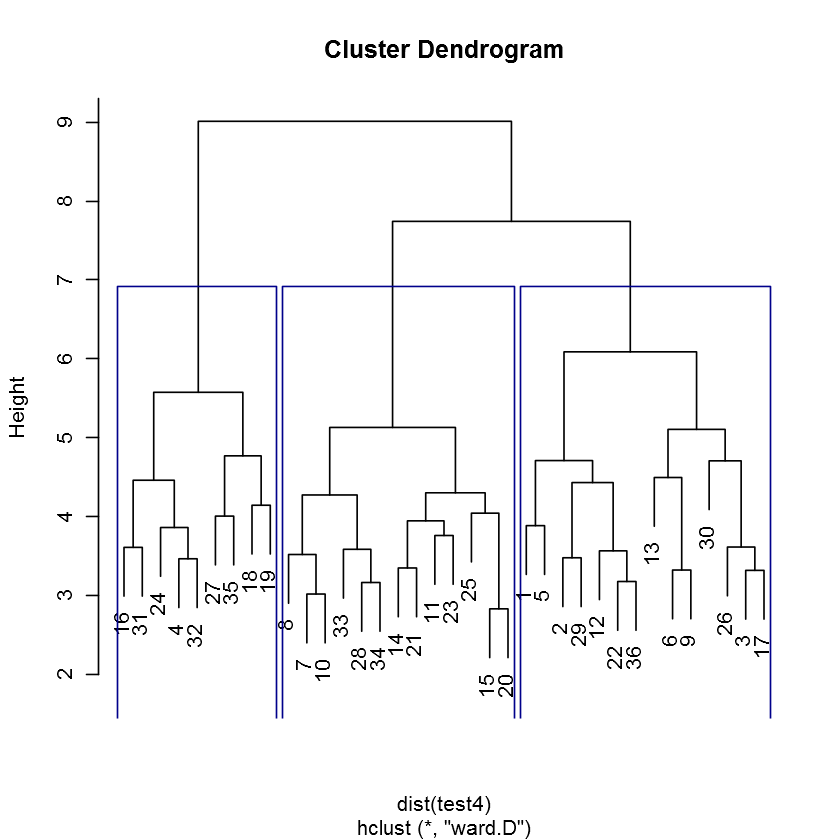

In [12]:
dend_test4=hclust(dist(test4),method="ward.D")
plot(dend_test4)#,hang=-1)
groups<- cutree(dend_test4, k=k_groups) 
rect.hclust(dend_test4, k=k_groups, border="darkblue") 

In [13]:
print (groups)
print (table (groups))

 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 1  1  1  2  1  1  3  3  1  3  3  1  1  3  3  2  1  2  2  3  3  1  3  2  3  1 
27 28 29 30 31 32 33 34 35 36 
 2  3  1  1  2  2  3  3  2  1 
groups
 1  2  3 
14  9 13 


## Perfiles para las variables prioridad

In [14]:
for (i in 1:ncol(test3)){
    data=test2[,i]
    data_table=prop.table(table(test3[,i],groups),2)
    jpeg(file = paste("Gráfico variable_",i,"_",varnames[i],".jpeg",sep=""),width = 640, height = 640, units = "px", quality = 95)
    bp=barplot(data_table,main=varnames[i],xlab="Grupos",ylab="Proporción")
    for (clust in 1:length(unique(groups))){
        yval=0
        for (dat in 1:nrow(data_table)){
            if (data_table[dat,clust]>0){
                yval=yval+data_table[dat,clust]
                #print(c(clust,yval))
                text(clust,yval-0.015,rownames(data_table)[dat], cex=0.8)
            }
        }
    }
    dev.off()
}
#summary(test1)

## Principal Component Analysis

https://www.r-bloggers.com/computing-and-visualizing-pca-in-r/

Handbook of data analysis R
https://cran.r-project.org/web/packages/HSAUR/vignettes/Ch_principal_components_analysis.pdf

In [15]:
#data_pca=test1
data_pca=test2
for (i in 1:ncol(test2)){
    vectr=test2[,i]
    #mode_vect=getmode(vectr[!is.na(vectr)])[1]
    mean_vect=mean(vectr[!is.na(vectr)])
    vectr[is.na(vectr)]=mean_vect#mode_vect
    data_pca[,i]=vectr
}
#data_pca

In [16]:
km_test3=kmeans(x = data_pca,centers=k_groups,iter.max=25,nstart=100)
print (names(km_test3))
km_test3

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


K-means clustering with 3 clusters of sizes 11, 5, 20

Cluster means:
      edad     sexo poblacin_esp lug_trabajo ing_mensual grupo_fliar
1 42.81818 1.000000    0.8650138    4.352273    1.545455    4.181818
2 43.00000 1.000000    0.3030303    4.400000    2.000000    4.200000
3 25.04857 1.102857    0.3757576    3.481250    0.950000    3.000000
  profesin_padre educacin_padre profesin_madre educacin_madre educa_pareja
1      0.3636364       1.454545      0.1818182       2.363636          2.0
2      2.6000000       1.800000      0.8000000       1.600000          4.4
3      1.2071429       1.887143      0.6000000       2.250000          4.6
  prof_mayores1 profesin_hnos2 profesin_hnos3 otra_carrera mot_calidad
1      1.727273              0            0.0     8.545455         2.0
2      0.000000             14            2.8    12.000000         1.8
3      0.000000              1            0.6     7.100000         1.8
  mot_costo mot_beneficio mot_gusto mot_personal   costos  calidad mod

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 0.6616014

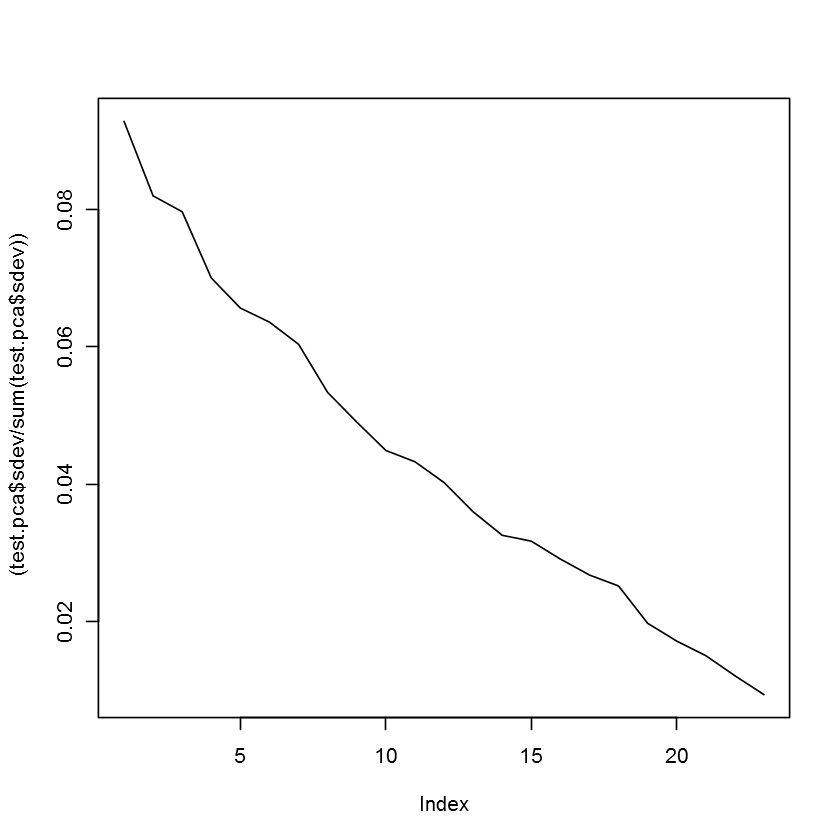

 [1] 0.09285185 0.17484722 0.25452654 0.32456815 0.39022718 0.45383822
 [7] 0.51422900 0.56760477 0.61666912 0.66160137 0.70488401 0.74514535
[13] 0.78114870 0.81372464 0.84544243 0.87455138 0.90134013 0.92652917
[19] 0.94629268 0.96345861 0.97850738 0.99062679 1.00000000


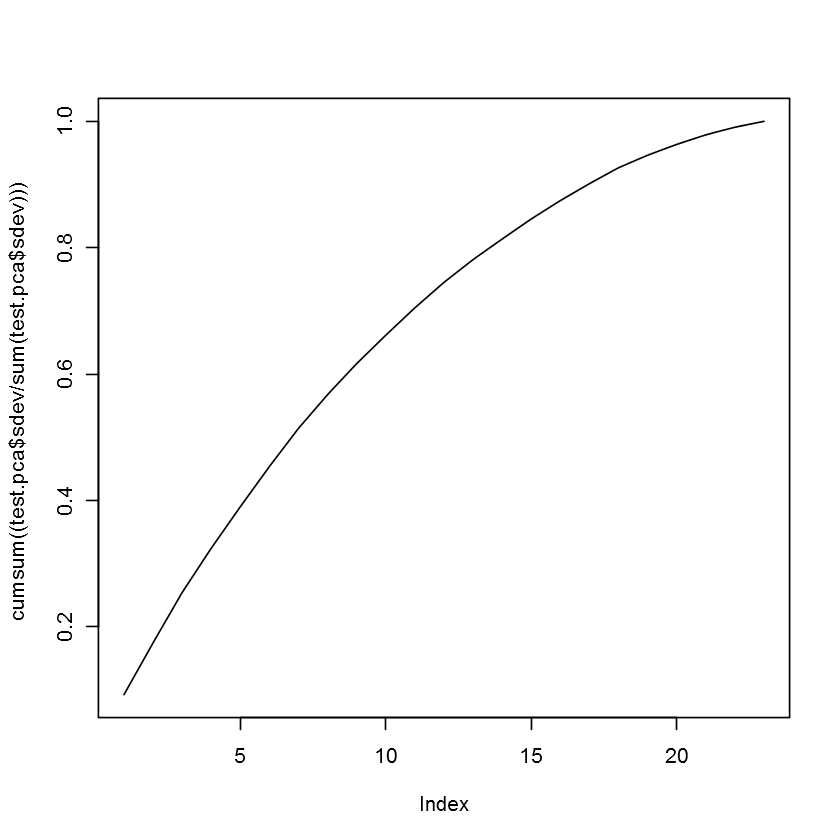

In [17]:
test.pca <- prcomp(data_pca, center = TRUE, scale. = TRUE) 
names(test.pca)
#print((test.pca$sdev/sum(test.pca$sdev)),type="l")
plot((test.pca$sdev/sum(test.pca$sdev)),type="l")
sum((test.pca$sdev/sum(test.pca$sdev))[1:10])
plot(cumsum((test.pca$sdev/sum(test.pca$sdev))),type="l")
print(cumsum((test.pca$sdev/sum(test.pca$sdev))))

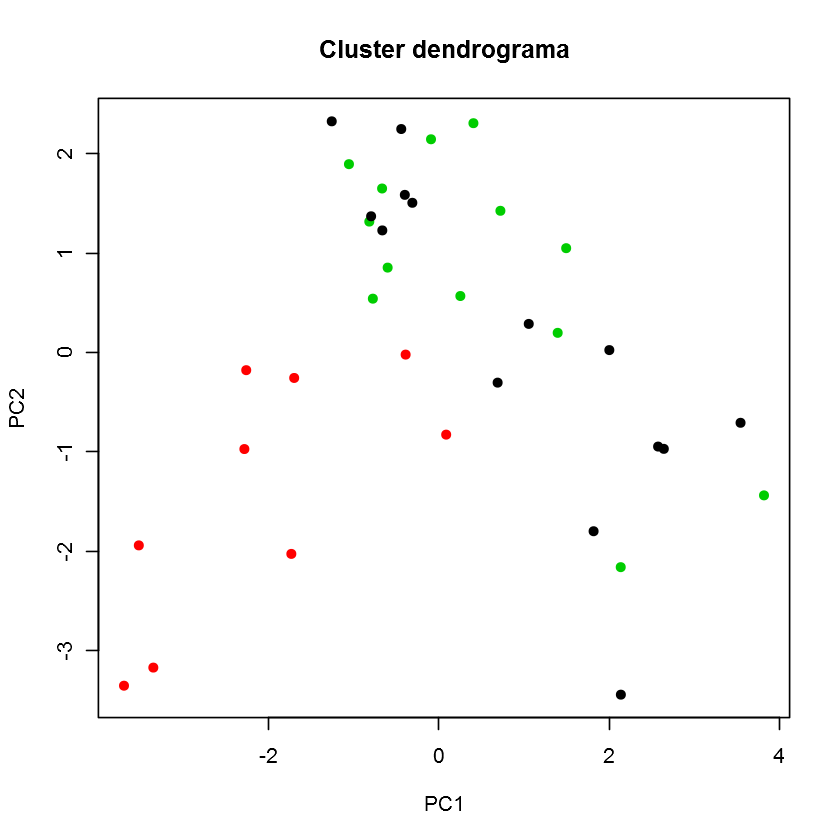

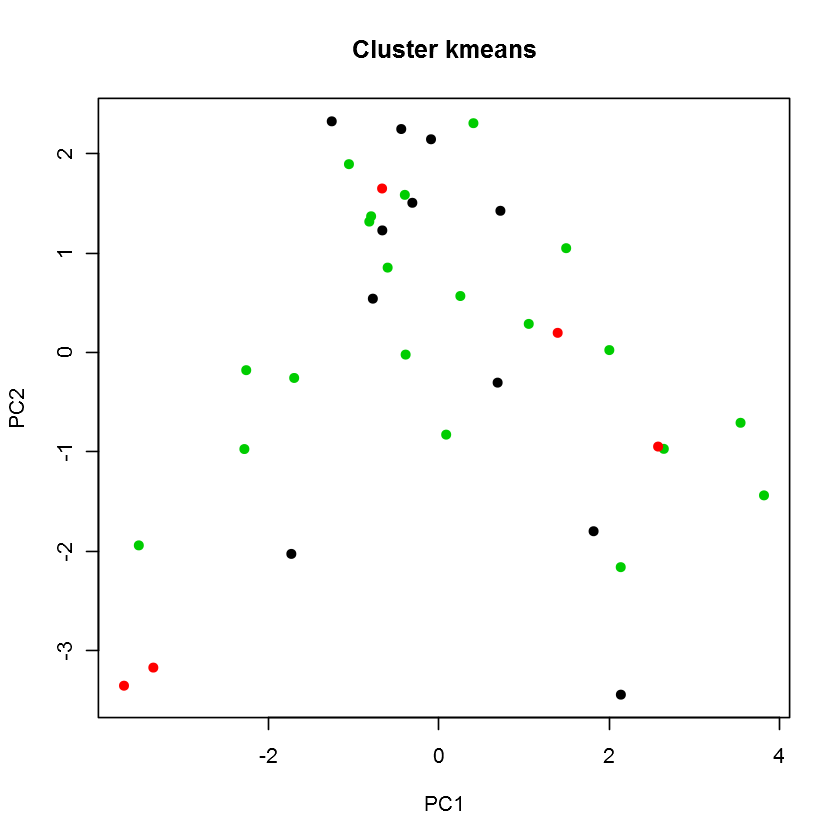

In [18]:
plot(test.pca$x, col=groups,pch=16, main="Cluster dendrograma")
plot(test.pca$x, col=km_test3$cluster,pch=16, main="Cluster kmeans")


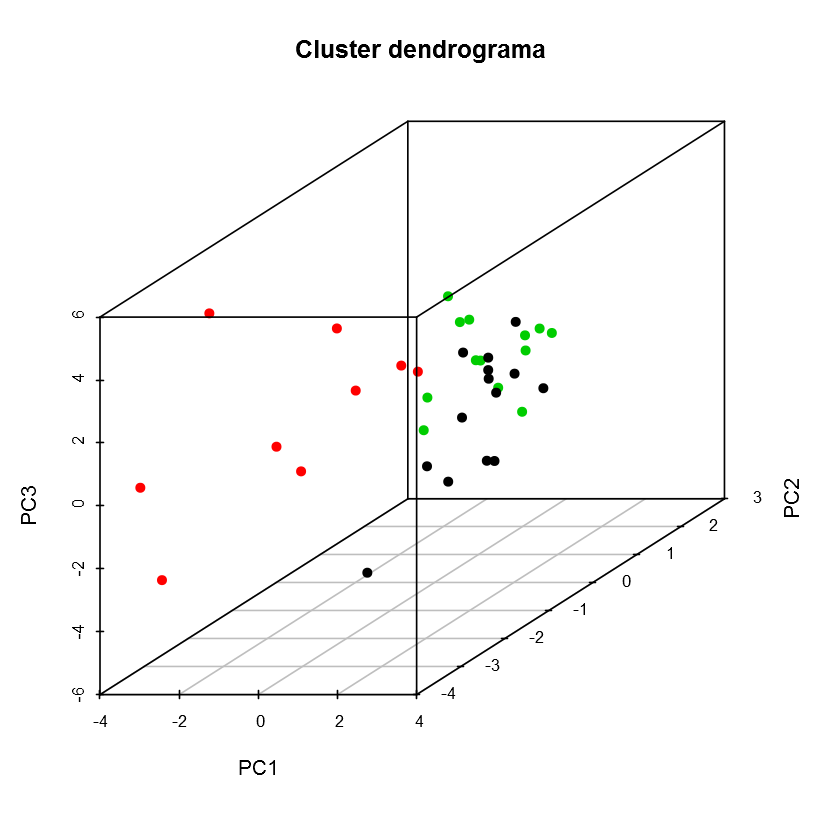

In [19]:
#scatterplot3d(test.pca$rotation[,1:3], col=groups ,pch=16, main="Cluster dendrograma")
scatterplot3d(test.pca$x[,1:3], pch=16,color=groups, main="Cluster dendrograma")

In [20]:
#names(test.pca)
#test.pca$x

In [21]:
modas=matrix(ncol = length(unique(groups)),nrow = length(colnames(data_pca)))
#colnames(modas)=c("Clust_1","Clust_2","Clust_3","Clust_4")
rownames(modas)=colnames(data_pca)
medias=modas

for(i in 1:max(groups)){
    #print(paste("*************","Cluster",i,"*************"))
    for (j in 1:ncol(data_pca)){
        #barplot(table(data_pca[groups==i,j]),main=colnames(data_pca)[j])
        modas[j,i]=getmode(data_pca[groups==i,j])
        medias[j,i]=mean(data_pca[groups==i,j])
    }
    #print(summary(data_pca[groups==i,]))
    #print(paste("*************","Cluster",i,"*************"))
}

                     [,1]        [,2]       [,3]
edad           36.6428571 32.11111111 29.6131868
sexo            1.0000000  1.22222222  1.0043956
poblacin_esp    0.8225108  0.05723906  0.5011655
lug_trabajo     4.4107143  6.09722222  1.7596154
ing_mensual     1.2857143  2.66666667  0.3076923
grupo_fliar     4.7142857  1.66666667  3.5384615
profesin_padre  0.3571429  3.46031746  0.3846154
educacin_padre  1.9285714  1.74920635  1.5384615
profesin_madre  0.0000000  2.00000000  0.0000000
educacin_madre  2.0000000  1.88888889  2.6153846
educa_pareja    3.2857143  2.33333333  5.3076923
prof_mayores1   1.3571429  0.00000000  0.0000000
profesin_hnos2  0.7857143  4.77777778  2.7692308
profesin_hnos3  0.0000000  2.88888889  0.0000000
otra_carrera    8.2142857  8.00000000  8.3846154
mot_calidad     1.7857143  1.88888889  1.9230769
mot_costo       1.4285714  2.00000000  1.7692308
mot_beneficio   1.8571429  2.00000000  1.6923077
mot_gusto       1.2142857  1.22222222  1.4615385
mot_personal    1.42

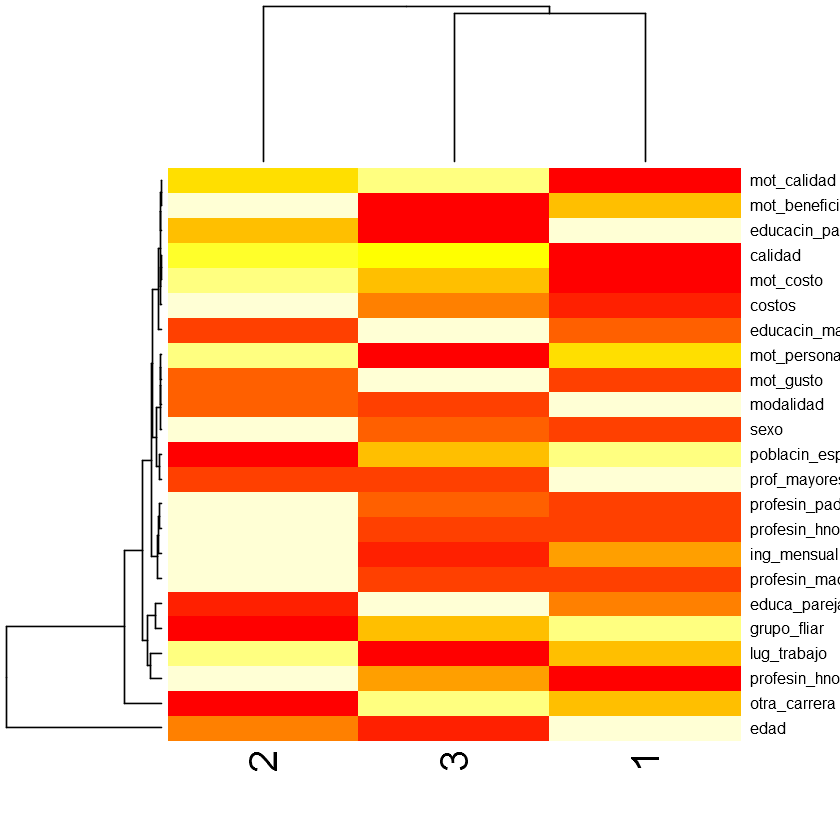

In [22]:
print(medias)
print(dist(t(medias)))
heatmap(medias)

               [,1] [,2] [,3]
edad             40   25   40
sexo              1    1    1
poblacin_esp      0    0    0
lug_trabajo       0    5    0
ing_mensual       1    2    0
grupo_fliar       6    1    2
profesin_padre    0    0    0
educacin_padre    1    2    0
profesin_madre    0    0    0
educacin_madre    1    2    4
educa_pareja      0    0    0
prof_mayores1     0    0    0
profesin_hnos2    0    0    0
profesin_hnos3    0    0    0
otra_carrera      0    0    7
mot_calidad       2    2    2
mot_costo         1    2    2
mot_beneficio     2    2    2
mot_gusto         1    1    1
mot_personal      1    1    1
costos            1    2    2
calidad           2    2    2
modalidad         2    1    1


          1         2
2 16.763055          
3  8.888194 17.663522

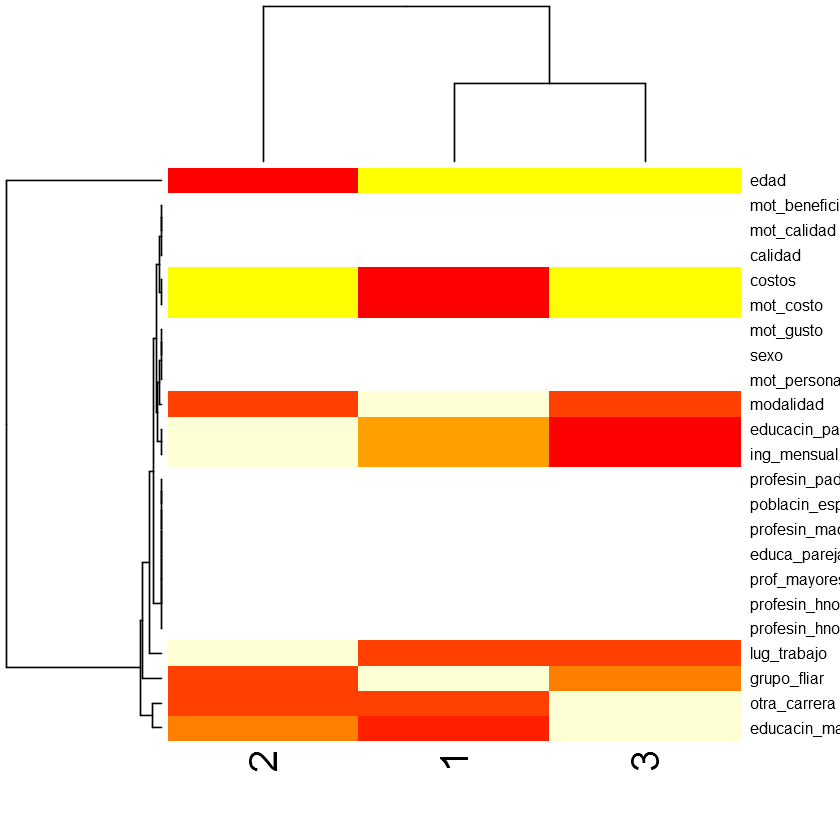

In [23]:
print(modas)
dist(t(modas))
heatmap(modas)

### Utilizar arboles de decisión para visualizar la variable más discriminativa